# Problem 2

Let's first simulate a 2D nonlinear functions as follow. The goal of this task is to predict the true function by observing few samples from it.


In [26]:
import numpy as np

def create2Dsurface(x,y):
    z = x*np.exp(-x**2-y**2) 
    return z


### Create Training Data
To do this, we will create our training dataset and visulaize the as follow:




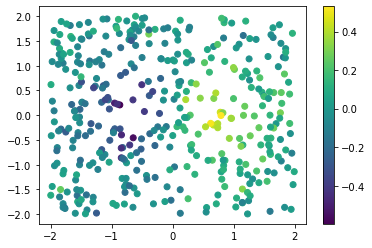

In [27]:
import matplotlib.pyplot as plt

n = 400
x = np.random.rand(n)*4-2 # create data from [-2,2]
y = np.random.rand(n)*4-2 # create data from [-2,2]
Ztrue = create2Dsurface(x,y)
y_train = Ztrue+np.random.randn(n)*0.1
X_train = np.concatenate((x.flatten()[:,np.newaxis],y.flatten()[:,np.newaxis]),axis=1)

plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
plt.colorbar()
plt.show()

In [28]:
print(x.shape,y.shape)

(400,) (400,)


### Create a visualization function for the Testing Data
We will create our Testing dataset based on the 2D meshgrid and visulaize the image of this 2D surface. You can use `visualize_2D`.

In [29]:
ntest = 100
ti = np.linspace(-2.0, 2.0, ntest)
x1test, x2test = np.meshgrid(ti, ti)
y_test = create2Dsurface(x1test,x2test).flatten()
X_test = np.concatenate((x1test.flatten()[:,np.newaxis],x2test.flatten()[:,np.newaxis]),axis=1)


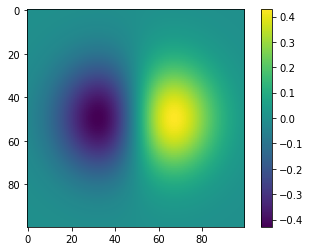

In [30]:
def visualize_2D(y_test):
    plt.imshow(y_test.reshape((ntest,ntest)))
    plt.colorbar()
    plt.show()

visualize_2D(y_test)

# Part 1: Plotting Learning Curves
We will try the following methods on this dataset
- Linear Regression
- Support Vector Regression (Kernel version)
- Random Forest Regressor
- Kernel Ridge Regression

## Let's try the Linear Regression on the dataset
Please implement `LinearRegression` from [sklearn.linear_model](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to fit `y_train` from `X_train`.
Please use the testind data `X_test` and `y_test`. 
 1. Compute the mean-square error for the linear regression for the testing samples.
 2. Visualize the final fitting result in a 2D image using `visualize_2D` function. Please briefly summarize your findings.


Mean Squared Error of leaset square is equal to = 0.01787283103663428


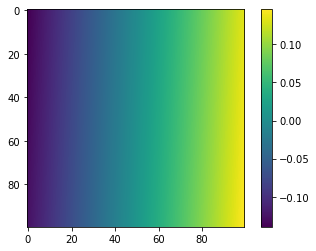

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

print("Mean Squared Error of leaset square is equal to =",mean_squared_error(y_pred, y_test))
visualize_2D(y_pred)

## Let's try the Kernel SVM Regression on the dataset
Please implement `SVR` from [sklearn.svm](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm) to fit `y_train` from `X_train`. Please stick with the default `rbf` kernel.

Please use the testind data `X_test` and `y_test`. 
 1. Use tuning parameter selection to select the best kernel bandwidth `gamma` and regularization constance `C`
 2. Compute the mean-square error for the predicted samples.
 3. Visualize the final fitting result in a 2D image using `visualize_2D` function. Please briefly summarize your findings.


The Best parameters are as follows: {'C': 1, 'gamma': 1, 'kernel': 'rbf'} ,testing accuracy: 0.9600536611397934

Mean square error of SVR is = 0.0009599378793208864


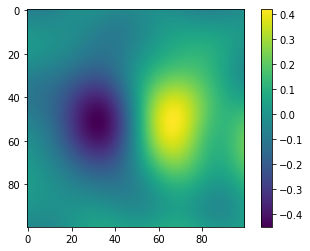

In [33]:
from sklearn.svm import SVR
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

gammas=[0.00001,0.001,0.01,0.1,1,10,100]
Cs = [0.01,0.1,1,10,100,1000]

kernels = ['rbf']
parameters = {'gamma':gammas, 'C':Cs, 'kernel':kernels}
svc = SVR()
clf = GridSearchCV(svc, parameters,return_train_score=True,cv=5)
clf.fit(X_train, y_train)
y_pred_svr = clf.predict(X_test)

print('The Best parameters are as follows:',clf.best_params_,',testing accuracy:',clf.best_estimator_.score(X_test,y_test))
print()
print("Mean square error of SVR is =",mean_squared_error(y_pred_svr,y_test))
visualize_2D(y_pred_svr)

## Let's try the Random Forest Regression on the dataset
Please implement `RandomForestRegressor` from [sklearn.ensemble](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble) to fit `y_train` from `X_train`. Please stick with the default `rbf` kernel.

Please use the testind data `X_test` and `y_test`. 


1. Use tuning parameter selection to select the best tuning parameters `n_estimators`, `max_depth`, `min_samples_split`, `min_samples_leaf`, `max_features` (Use “auto”, “sqrt”, “log2” options), 
2. Compute the mean-square error for the predicted samples.
3. Visualize the final fitting result in a 2D image using `visualize_2D` function. Please briefly summarize your findings



C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Mean square error of random forest regression is = 0.003031306060451929


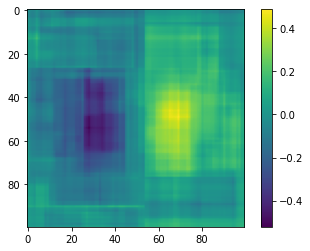

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_test1 = {
 'max_depth': [100,110,120],
 'max_features' : ['auto', 'sqrt', 'log2'],
  'min_samples_split': range(2,4,8),
 #'min_child_weight':range(1,6,2),
 'min_samples_leaf': [1,2,3],
 #'gamma':[i/10.0 for i in range(0,5)],
 'n_estimators': [100,200,300,400,500,600,2000]   
}

gsearch1 = GridSearchCV(estimator = RandomForestRegressor(), param_grid = param_test1, scoring='accuracy',n_jobs=4, cv=5)
gsearch1.fit(X_train,y_train)
y_pred_randfor = gsearch1.predict(X_test)

#print('best parameters:',clf.best_params_,',testing accuracy:',clf.best_estimator_.score(X_test,y_test))
print("Mean square error of random forest regression is =",mean_squared_error(y_pred_randfor,y_test))

visualize_2D(y_pred_randfor)
    
# for X, y in datasets:
#     # preprocess dataset, split into training and test part
#     X = StandardScaler().fit_transform(X)
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)
#     gsearch1.fit(X_train, y_train)
#     score = gsearch1.score(X_test, y_test)
#     print('Accuracy:{}, feature importance:{}'.format(score,gsearch1.best_estimator_.feature_importances_))
#     print(gsearch1.best_params_)

## Let's try the Kernel Ridge Regression on the dataset
Please implement `KernelRidge` from [sklearn.kernel_ridge](https://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html#sklearn.kernel_ridge.KernelRidge) to fit `y_train` from `X_train`. Please make sure to change the kernel to `rbf` given the default is `linear`.

Please use the testind data `X_test` and `y_test`. 

1. Use tuning parameter selection to select the best tuning parameters `gamma` for rbf kernel scale and `alpha` for the regularization strength.
2. Compute the mean-square error for the predicted samples.
3. Visualize the final fitting result in a 2D image using `visualize_2D` function. Please briefly summarize your findings




C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Mean Square Error of Kernal ridge regression is = 0.017873671114241044


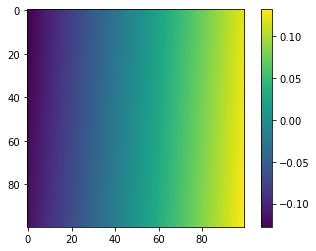

In [35]:
from sklearn.kernel_ridge import KernelRidge

kernels = ['rbf']
parameters = {'gamma':[1e-3,1e-4,1e-2,1e1], 'alpha': [0.1,10,20,100], 'kernel':kernels}
kernal_rr = GridSearchCV(estimator = KernelRidge(), param_grid = parameters, scoring='accuracy',n_jobs=4, cv=5)
kernal_rr.fit(X_train,y_train)

y_pred_krrr = kernal_rr.predict(X_test)
#print('best parameters:',clf.best_params_,',testing accuracy:',clf.best_estimator_.score(X_test,y_test))
print("Mean Square Error of Kernal ridge regression is =",mean_squared_error(y_pred_krrr,y_test))

visualize_2D(y_pred_krrr)

# Part 2: Plotting Learning Curves

We would like to plot the learning curve of the data. The following code is taken from the following this [example](http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html), where we can use the function of [learning curve](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html#sklearn.model_selection.learning_curve) to plot the learning curve plot. 


- Linear Regression
- Support Vector Regression (Kernel version)
- Random Forest Regressor
- Kernel Ridge Regression

Please justify the result and comment on the learning curve. 

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt



In [37]:
import numpy as np
#print(X_train)

X= np.concatenate((X_test,X_train))
Y= np.concatenate((y_test,y_train))

<module 'matplotlib.pyplot' from 'C:\\Users\\nikhi\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

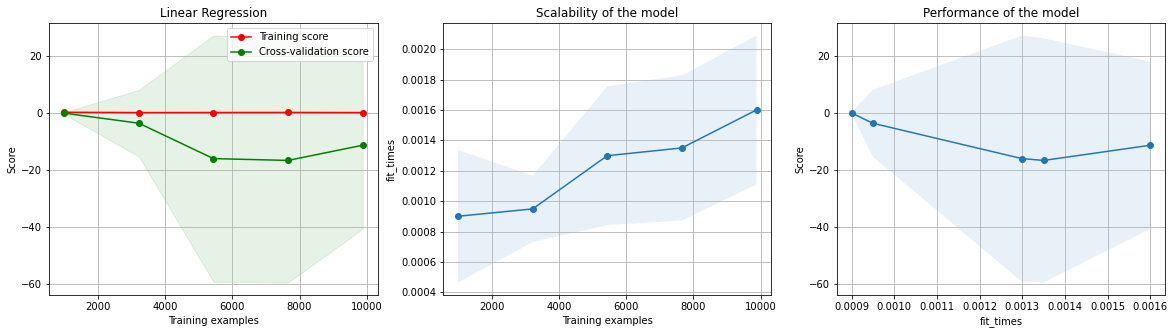

In [38]:
estimator = LinearRegression()
title = "Linear Regression"
plot_learning_curve(estimator, title, X, Y, cv= 20, n_jobs= 4)

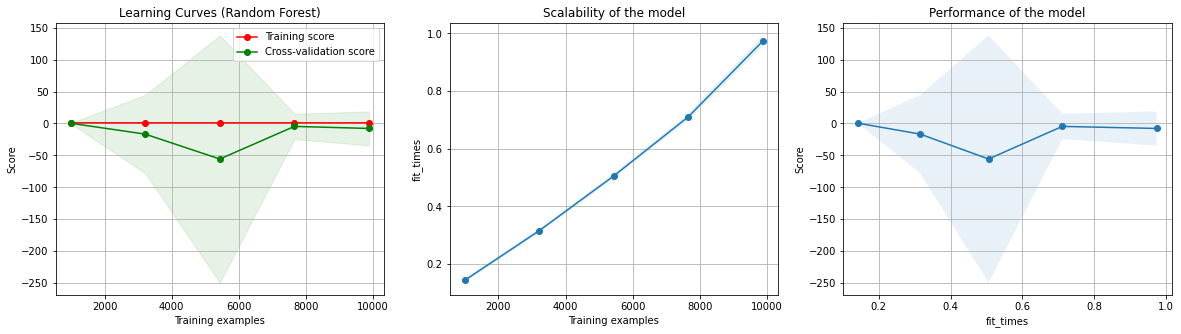

In [39]:
# Random Forest regression

title = "Learning Curves (Random Forest)"
estimator = RandomForestRegressor()
plot_learning_curve(estimator, title, X, Y, cv= 20, n_jobs= 4)
plt.show()

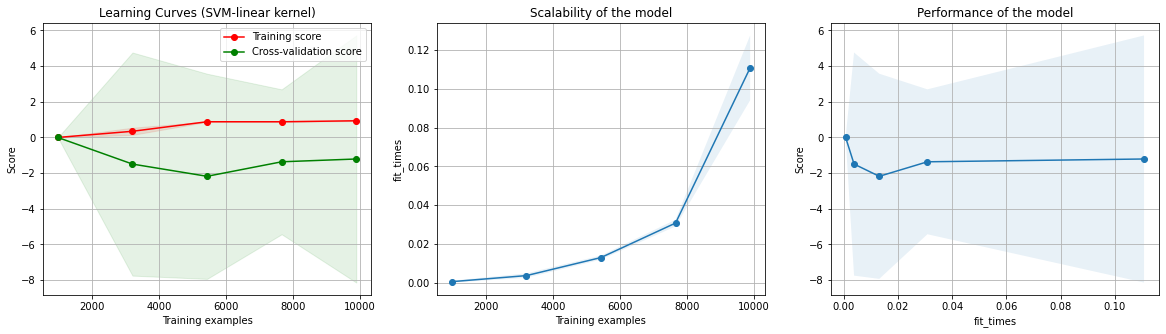

In [40]:
# Support Vector Regression classifiers with linear kernel

title = "Learning Curves (SVM-linear kernel)"
estimator = SVR()
plot_learning_curve(estimator, title, X, Y, cv= 20, n_jobs= 4)
plt.show()

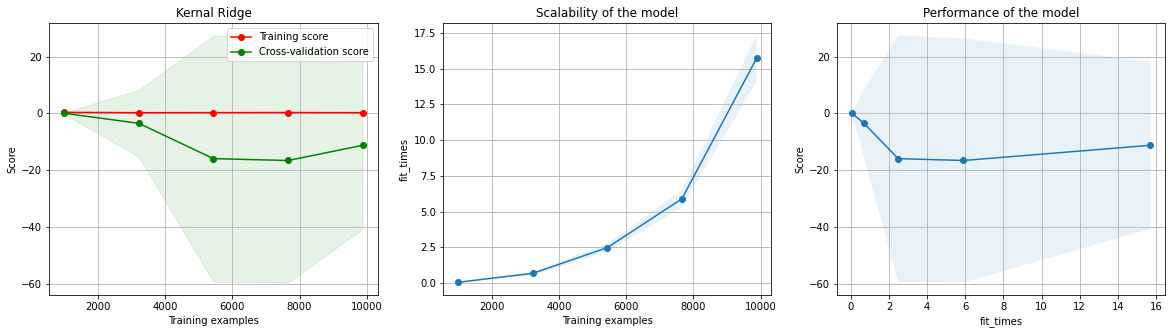

In [41]:
# Kernel Ridge regression

title = "Kernal Ridge"
estimator = KernelRidge()
plot_learning_curve(estimator, title, X, Y, cv= 20, n_jobs= 4)
plt.show()